<a href="https://colab.research.google.com/github/Yohanes213/Zindi/blob/main/Zindi_Urban_Air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install --upgrade category_encoders

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMRegressor
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
#from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')

In [ ]:
print("The shape of the train data ", train.shape)
print("The shape of the test data ", test.shape)


The shape of the train data  (30557, 82)
The shape of the test data  (16136, 77)


In [ ]:
unique_col = []

for col in train.columns:
  if col in test.columns:
    continue
  else:
    unique_col.append(col)

In [ ]:
len(unique_col)

5

In [ ]:
unique_col

['target', 'target_min', 'target_max', 'target_variance', 'target_count']

In [ ]:
train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0

In [ ]:
test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,0.000184,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,0.000014,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.112502,229.235631,0.007113,75.552445,55.8

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [ ]:
train.drop(columns = ["L3_CH4_CH4_column_volume_mixing_ratio_dry_air",
            "L3_CH4_aerosol_height",
            "L3_CH4_aerosol_optical_depth",
                 "L3_CH4_sensor_azimuth_angle",
                 "L3_CH4_sensor_zenith_angle",
                 "L3_CH4_solar_azimuth_angle",
                 "L3_CH4_solar_zenith_angle",
                 "target_min",
                 "target_max",
                 "target_variance",
                 "target_count"], inplace=True)

In [ ]:
test.drop(columns = ["L3_CH4_CH4_column_volume_mixing_ratio_dry_air",
            "L3_CH4_aerosol_height",
            "L3_CH4_aerosol_optical_depth",
                 "L3_CH4_sensor_azimuth_angle",
                 "L3_CH4_sensor_zenith_angle",
                 "L3_CH4_solar_azimuth_angle",
                 "L3_CH4_solar_zenith_angle",], inplace=True)

In [ ]:
train.shape

(30557, 71)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 71 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   precipitable_water_entire_atmosphere                 30557 non-null  float64
 5   relative_humidity_2m_above_ground                    30557 non-null  float64
 6   specific_humidity_2m_above_ground                    30557 non-null  float64
 7   temperature_2m_above_ground                          30557 non-null  float64
 8   u_component_of_wind_10m_above_ground                 30557 non-nul

In [ ]:
cor = train.corr().abs()
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

train.drop(columns = to_drop, inplace=True)
test.drop(columns = to_drop, inplace=True)

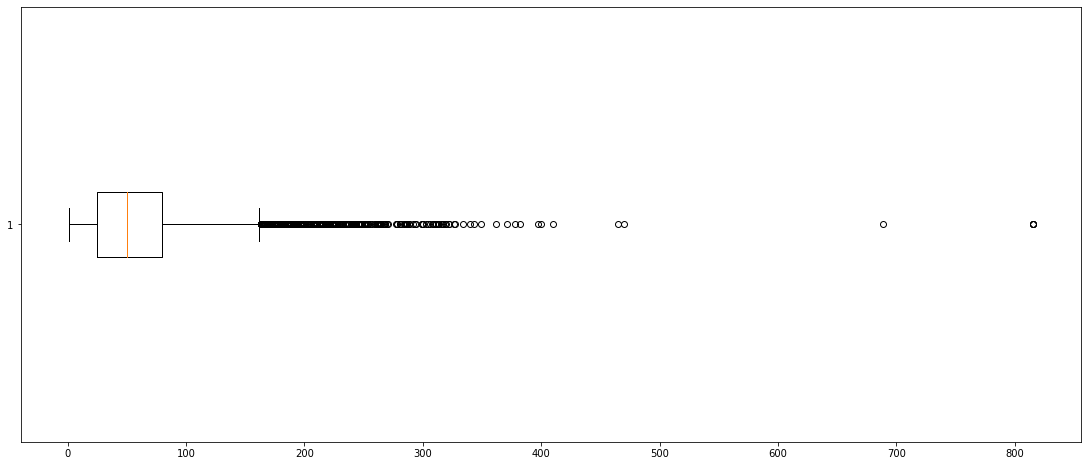

In [ ]:
plt.figure(figsize=(19,8))
plt.boxplot(train["target"], vert=False);

In [ ]:
train.describe()

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_optical_depth,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index
count,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,28368.000000,28368.000000,28368.000000,28368.000000,28368.000000,28367.000000,28367.000000,28367.000000,28367.000000,28367.000000,28367.000000,21888.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,2.313200e+04,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,29035.000000,29035.000000,29035.000000,30360.000000,30360.000000,23320.000000,23320.000000,23320.000000,23249.000000
mean,61.148045,15.302326,70.552747,0.006004,9.321342,0.416886,0.088486,0.000094,0.000163,-1.093982,0.278011,755880.302425,-10.597347,32.764304,-111.413784,44.432617,0.000032,13342.570998,0.000056,0.139533,222.293932,0.423740,-11.308360,35.727367,-117.739509,47.752032,0.036230,983.448217,1438.006332,821611.615359,-12.590815,-124.192829,4.320685e-05,0.199705,-14.127472,-122.640817,0.000088,1.064105,2510.989311,18.201564,0.226843,-1.161213,832553.776969,0.000113,0.429221,0.000032,-1.944519
std,46.861309,10.688573,18.807884,0.003787,9.343226,2.707990,2.641924,0.000094,0.000109,0.610955,0.302029,240683.630314,70.254305,20.446907,75.745442,19.435522,0.000013,7021.740896,0.000075,0.030511,33.285438,0.350641,70.740608,18.952405,69.854894,15.611045,0.010909,906.694162,1419.561140,94816.160441,72.713500,73.257718,7.670074e-05,0.144009,75.402271,72.286555,0.000094,0.362690,2244.918638,23.790555,0.102019,0.538363,2925.955780,0.000899,0.252026,0.000167,0.707915
min,1.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,-15.023647,-0.000051,0.000000,-3.941742,0.000000,0.000000,-111.466479,0.000000,-179.954025,0.000000,0.000000,0.000000,-0.000049,0.000000,0.000000,0.000000,-111.947832,0.000000,-179.831335,0.000000,0.000000,0.000000,-489.869019,0.000000,-106.055634,-179.877302,-5.625598e-04,0.000000,-112.155752,-179.831335,-0.000630,0.000000,8.997803,1.000000,0.015649,-3.967332,828758.030458,-0.038756,0.000000,-0.004309,-4.833706
25%,25.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,-1.415701,0.000056,0.000122,-1.514681,0.026338,829679.660006,-96.451893,14.543992,-165.668942,34.714240,0.000027,7311.869141,0.000016,0.121587,225.023627,0.105163,-96.706903,19.278833,-165.808807,37.795179,0.031181,414.197452,187.688748,830284.318590,-94.621325,-166.767275,-6.926798e-07,0.075575,-97.498767,-165.620912,0.000028,0.850102,771.406343,5.195713,0.167613,-1.517307,830410.133360,-0.000107,0.251275,-0.000043,-2.372976
50%,50.000000,1

(30557, 50)

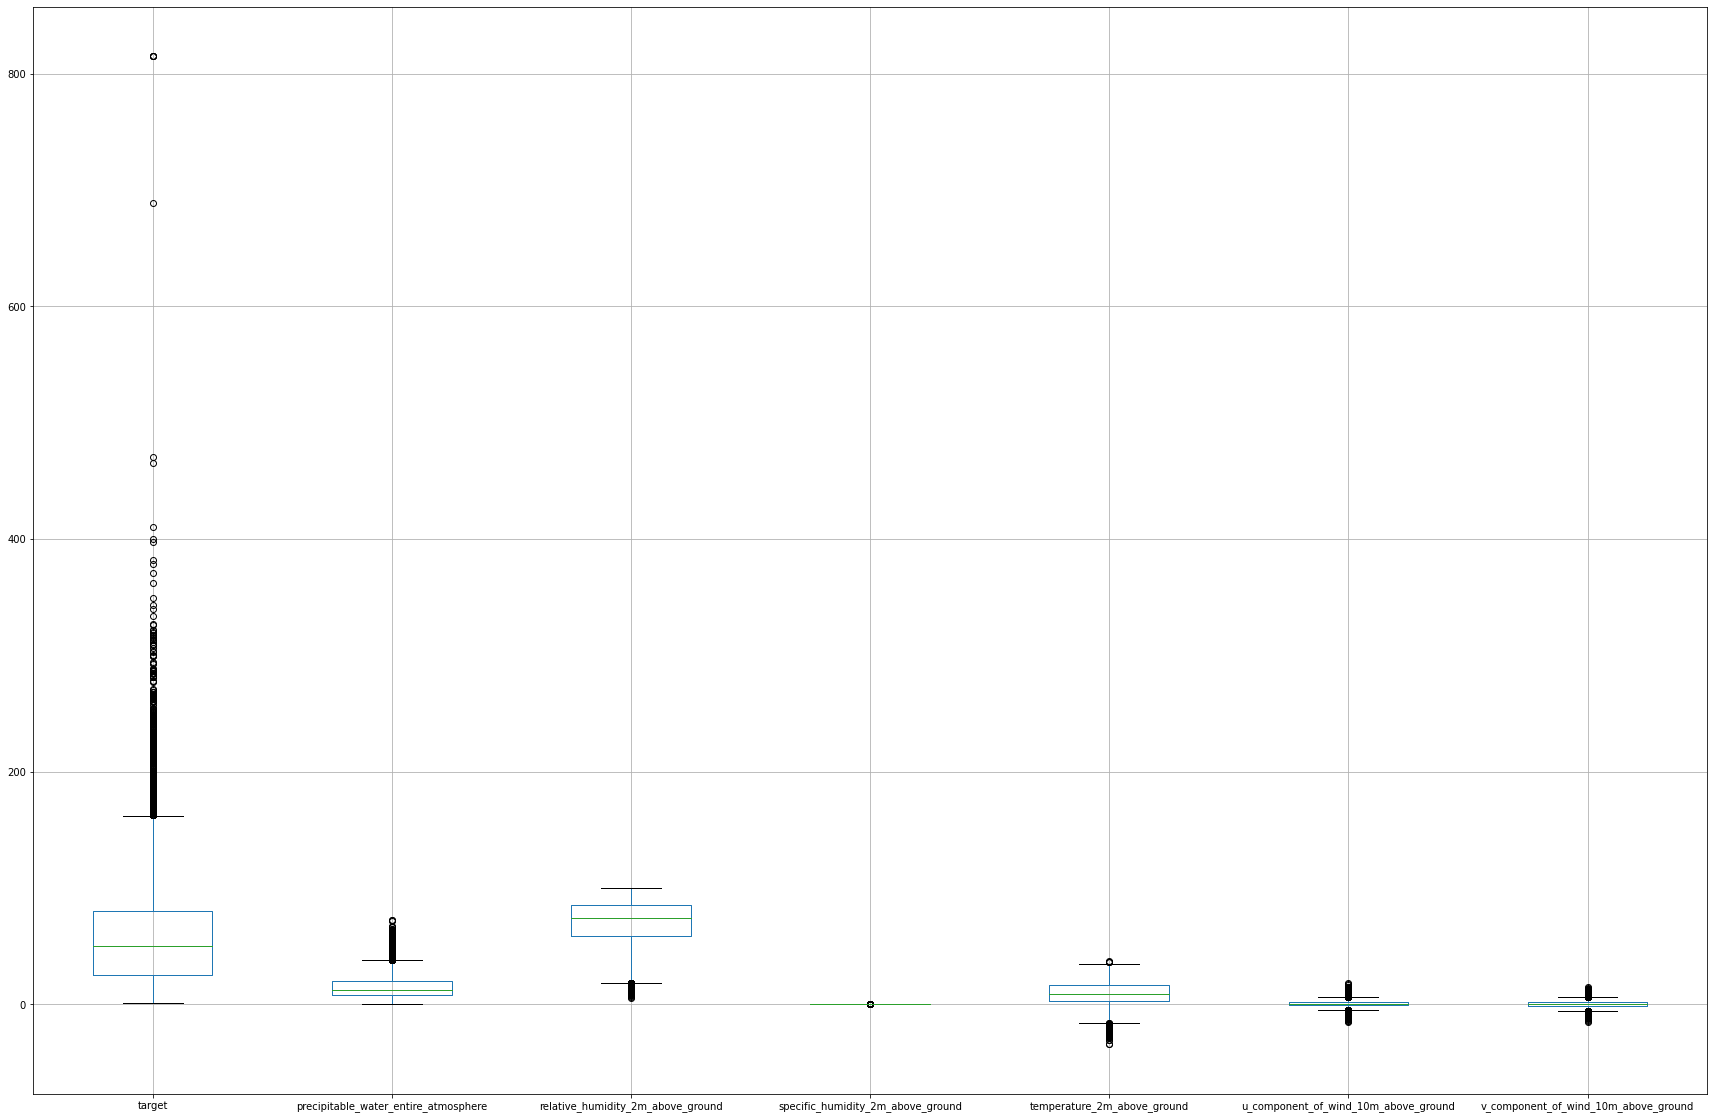

In [ ]:
train[train.columns[:10]].boxplot(figsize=(30,20));

In [ ]:
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function removes outliers from a given dataframe by calculating the lower and upper bounds of the interquartile range (IQR). 
    Outliers are defined as values that are less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles,
    respectively.

    Input:
    df (pd.DataFrame): A dataframe containing numeric columns

    Output:
    df (pd.DataFrame): A dataframe containing only rows that are not considered outliers
    """
    
    Q1 = df.quantile(.1, numeric_only=True) # find the Q1 value for each column with numeric data
    Q3 = df.quantile(.9, numeric_only=True) # find the Q3 value for each column with numeric data
    IQR = Q3 - Q1 # find the interquartile range for each column with numeric data
    
    # return the dataframe with rows that do not have any values lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

train_clean = remove_outliers(train)

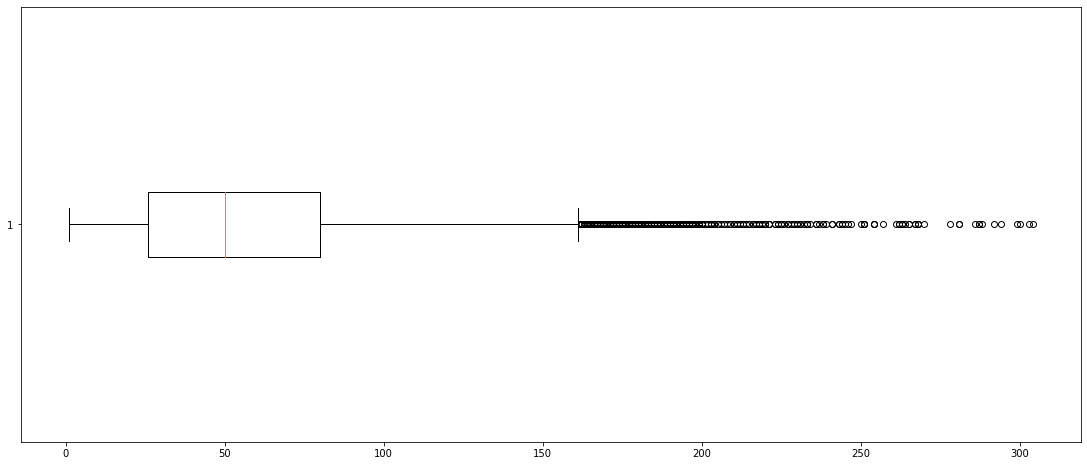

In [ ]:
plt.figure(figsize=(19,8))
plt.boxplot(train_clean["target"], vert=False);

In [ ]:
print(train.shape)
test.shape

(30557, 50)


(16136, 49)

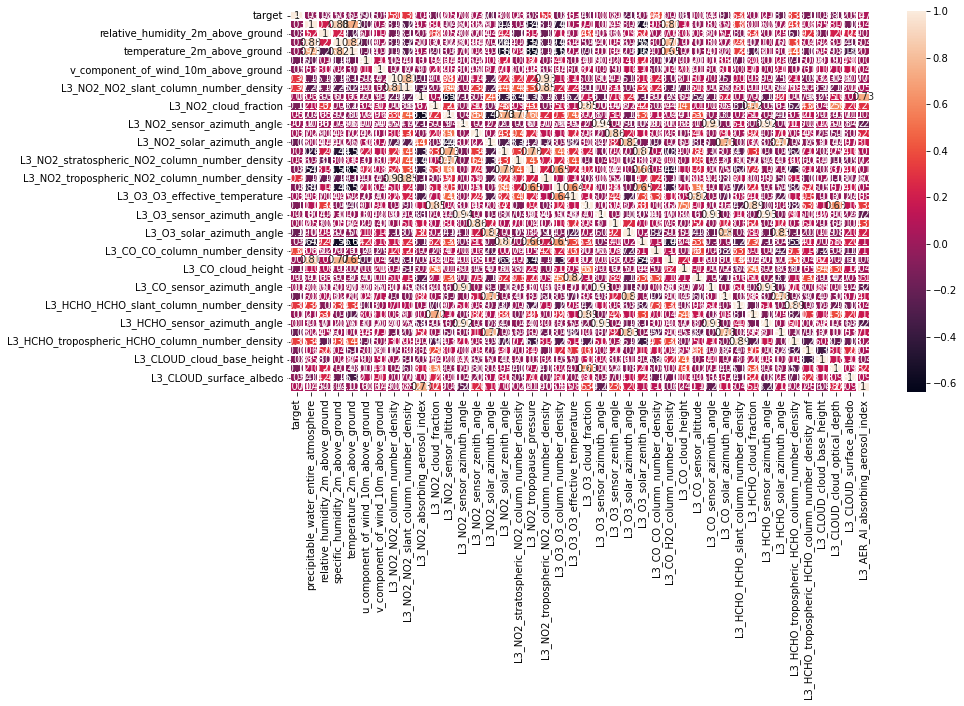

In [ ]:
plt.figure(figsize=(13,7))
corr = train[train.columns[:45]].corr()
sns.heatmap(corr, annot=True, linewidths=0.1,vmax=1.0, linecolor='white', square=False);

In [ ]:
train[train.columns[:15]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Place_ID X Date                         30557 non-null  object 
 1   Date                                    30557 non-null  object 
 2   Place_ID                                30557 non-null  object 
 3   target                                  30557 non-null  float64
 4   precipitable_water_entire_atmosphere    30557 non-null  float64
 5   relative_humidity_2m_above_ground       30557 non-null  float64
 6   specific_humidity_2m_above_ground       30557 non-null  float64
 7   temperature_2m_above_ground             30557 non-null  float64
 8   u_component_of_wind_10m_above_ground    30557 non-null  float64
 9   v_component_of_wind_10m_above_ground    30557 non-null  float64
 10  L3_NO2_NO2_column_number_density        28368 non-null  fl

In [ ]:
dis = pd.DataFrame({
    'Unique' : train.nunique(),
    'Null' : train.isnull().sum(),
    'Percentage Missing(%)' : train.isnull().sum() * 100 / len(train)
})

In [ ]:
dis.sort_values(by="Unique")

,Unique,Null,Percentage Missing(%)
Date,94,0,0.000000
Place_ID,340,0,0.000000
target,375,0,0.000000
relative_humidity_2m_above_ground,11284,0,0.000000
precipitable_water_entire_atmosphere,12633,0,0.000000
L3_NO2_tropospheric_NO2_column_number_density,19276,8669,28.369932
L3_NO2_tropopause_pressure,20372,2190,7.166934
specific_humidity_2m_above_ground,21396,0,0.000000
L3_HCHO_cloud_fraction,21784,7425,24.298851
L3_HCHO_tropospheric_HCHO_column_number_density,22802,7425,24.298851


In [ ]:
X = train.drop(['Place_ID X Date', 'Date', 'Place_ID','target'], axis = 1)
y = train.target
test_df = test.drop(['Place_ID X Date', 'Date', 'Place_ID'], axis = 1)

In [ ]:
X_clean = train_clean.drop(['Place_ID X Date', 'Date', 'Place_ID','target'], axis = 1)
y_clean = train_clean.target
test_df = test.drop(['Place_ID X Date', 'Date', 'Place_ID'], axis = 1)

In [ ]:
test_df.shape

(16136, 46)

In [ ]:
X.shape

(30557, 46)

In [ ]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size = 0.3, random_state = 42)
#y_train = np.array(y_train)

model = LGBMRegressor()
model.fit(X_train, y_train)

# Local score
y_pred = model.predict(X_test)

score = mean_squared_error(y_test, y_pred, squared=False)
print('Local RMSE:', score)

print("Ther2 score" , r2_score(y_test, y_pred))

Local RMSE: 27.851093789357183
Ther2 score 0.6152544864106427


In [ ]:
prediction = model.predict(test_df)

array([36.17683857, 30.44482387, 29.45137829, ..., 47.15819444,
       49.82027199, 59.85928014])

In [ ]:
X_test.shape

(9168, 46)

In [ ]:
model_linear = make_pipeline(
    SimpleImputer(strategy='mean'),
    #OneHotEncoder(),
    LinearRegression()
)


model_linear.fit(X_train,y_train)
y_pred_l = model_linear.predict(X_test)

score_l = mean_squared_error(y_test, y_pred_l, squared=False)
print('Local RMSE:', score_l)

print("Ther2 score" , r2_score(y_test, y_pred_l))

Local RMSE: 34.85641299827132
Ther2 score 0.39736487917992847


In [ ]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
im = SimpleImputer(strategy="median")

im.fit(X_train)
im_train = im.transform(X_train)



In [ ]:
im.fit(X_test)
im_test = im.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(im_train)
X_test_scaled = scaler.fit_transform(im_test)

In [ ]:
tf.random.set_seed(42)

model_tf = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model_tf.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics=["mae"]#, r2_score] ,run_eagerly=True
             )

model_tf.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
561/561 [==============================] - 3s 4ms/step - loss: 26.8606 - mae: 26.8606 - val_loss: 29.0130 - val_mae: 29.0130
Epoch 2/100
561/561 [==============================] - 2s 4ms/step - loss: 23.5559 - mae: 23.5559 - val_loss: 29.4876 - val_mae: 29.4876
Epoch 3/100
561/561 [==============================] - 2s 4ms/step - loss: 22.5818 - mae: 22.5818 - val_loss: 38.7234 - val_mae: 38.7234
Epoch 4/100
561/561 [==============================] - 2s 4ms/step - loss: 22.0117 - mae: 22.0117 - val_loss: 26.0500 - val_mae: 26.0500
Epoch 5/100
561/561 [==============================] - 2s 4ms/step - loss: 21.4440 - mae: 21.4440 - val_loss: 55.9035 - val_mae: 55.9035
Epoch 6/100
561/561 [==============================] - 3s 5ms/step - loss: 21.1469 - mae: 21.1469 - val_loss: 39.4012 - val_mae: 39.4012
Epoch 7/100
561/561 [==============================] - 2s 4ms/step - loss: 20.6030 - mae: 20.6030 - val_loss: 33.0218 - val_mae: 33.0218
Epoch 8/100
561/561 [====================

In [ ]:
y_pred_tf = model_tf.predict(X_test_scaled)
score_tf = mean_squared_error(y_test, y_pred_tf, squared=False)
print('Local RMSE:', score_tf)

241/241 [==============================] - 1s 4ms/step
Local RMSE: 33.752314047695826


In [ ]:
y_p = model_tf.predict(X_train_scaled)
sc = mean_squared_error(y_train, y_p, squared=False)
print('Local RMSE:', sc)

561/561 [==============================] - 1s 1ms/step
Local RMSE: 19.840547894724647


In [ ]:
mean_absolute_error(y_test, y_pred_tf)


19.775873667480226

In [ ]:
r2_score(y_train, y_p)

0.9102250043129881

In [ ]:
r2_score(y_test, y_pred_tf)

0.5901083332293944

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge

model_r = Ridge(alpha = 0.01,tol = 0.001, \
              solver ='auto', random_state = 42)

model_r.fit(X_train_scaled, y_train)

y_pred_r = model_r.predict(X_test_scaled)

score_r = mean_squared_error(y_test, y_pred_r, squared=False)
print('Local RMSE:', score_r)

print("Ther2 score" , r2_score(y_test, y_pred_r))

Local RMSE: 37.013867271518755
Ther2 score 0.36565037190648253


In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.0001, max_iter=10000)
model_lasso.fit(X_train_scaled,y_train)


y_pred_lasso = model_lasso.predict(X_test_scaled)

score_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print('Local RMSE:', score_lasso)

print("Ther2 score" , r2_score(y_test, y_pred_r))


Local RMSE: 37.013852821681844
Ther2 score 0.36565037190648253


In [ ]:
train_score=model_lasso.score(X_train_scaled,y_train)
test_score=model_lasso.score(X_test_scaled,y_test)
print(train_score)
test_score

0.3611744007455783


0.3656508671936577

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_randomforest = RandomForestRegressor(n_estimators=100)

model_randomforest.fit(X_train_scaled, y_train)

y_pred_rf = model_randomforest.predict(X_test_scaled)

score_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print('Local RMSE:', score_rf)

print("Ther2 score" , r2_score(y_test, y_pred_rf))


Local RMSE: 30.102209296205213
Ther2 score 0.5804376540964451


In [ ]:
y_rf = model_tf.predict(X_train_scaled)
sc_rf = r2_score(y_train, y_rf)
print('Local RMSE:', sc_rf)

669/669 [==============================] - 1s 1ms/step
Local RMSE: 0.9102250043129881


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV , cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
clf = make_pipeline(
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(random_state=42)
) 

In [ ]:
#params = {
 #   "simpleimputer__strategy" : ["mean", "median"],
 #   "randomforestregressor__n_estimators" : range(25,100,25),
 #   "randomforestregressor__max_depth" : range(10, 50, 10)
#}

In [ ]:
#model_grid = GridSearchCV(
 #clf,
 #param_grid=params,
 #cv=5,
 #n_jobs=-1,
 #verbose=1   
#)

In [ ]:
#cv_score = cross_val_score(clf,X_train,y_train,cv=10,n_jobs=-1)
#cv_score

In [ ]:
#model_grid.fit(X_train,y_train)#, error_score='raise')

In [ ]:
#model_grid.best_params_

In [ ]:
#model_grid.best_score_

In [ ]:
#y_ppp = model_grid.predict(X_test)

#r2_score(y_test, y_ppp)

In [ ]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train_scaled, y_train)

In [ ]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,37.707574,0.357556
1,Ridge Regression,37.707530,0.357557
2,Lasso Regression,38.459324,0.331612
3,K Neighbors Regressor,35.417467,0.433404
4,Decision Tree Regressor,45.993655,0.062107
5,Random Forest Regressor,30.827706,0.574524
6,Gradient Boosting Regressor,33.754302,0.486025
7,Adaboost Regressor,56.919170,-0.485314
8,Linear Regression,34.287170,0.390149
9,Ridge Regression,34.287096,0.390152


In [ ]:
test_df.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_optical_depth,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index
0,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,-95.987015,0.000073,0.032071,68.099367,-95.984984,0.000088,1.494039,2592.634167,6.317523,0.299053,0.466173,835670.492740,0.000221,0.784436,0.000184,-0.140458
1,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,-95.017095,0.000048,0.040803,75.936813,-95.014908,0.000074,1.534485,7334.601102,8.308433,0.290397,-0.213657,835281.882757,0.000034,0.678988,0.000014,-0.842713
2,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.112502,229.235631,0.007113,75.552445,55.872276,-94.015418,14.140820,0.018736,944.341413,1281.892115,834751.987268,73.861680,-94.001436,0.000006,0.007113,75.552445,-94.015418,0.000042,1.680458,5188.524088,6.415458,0.279277,-0.254250,834839.050781,0.000184,0.667768,0.000122,-0.716770
3,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,0.000155,-0.268490,0.088795,836269.833912,-102.285091,59.174917,-97.248047,32.730747,0.000043,6156.074219,0.000012,0.113312,228.383705,0.062076,-102.285125,59.174188,-97.247602,32.730553,0.018304,873.850358,895.144001,836168.569714,-100.652057,-97.249432,-0.000025,0.062076,-102.285125,-97.247602,0.000013,1.653101,2601.282362,6.446504,0.359061,-0.268491,836269.833912,0.000201,0.696772,0.000133,-0.730104
4,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,0.000131,0.460720,0.041197,836043.111009,-102.133960,40.925873,-96.057236,28.320528,0.000047,6156.074219,0.000008,0.114592,229.490218,0.042777,-102.133957,40.925873,-96.057265,28.320527,0.018666,666.809145,1.000000,835978.237828,-100.252279,-96.059909,-0.000090,0.042055,-102.133930,-96.057578,-0.000027,1.426467,2557.196696,6.874006,0.331468,0.460720,836043.111009,0.000093,0.677305,0.000065,-0.108353


In [ ]:
X.shape

(30557, 46)

In [ ]:
prediction

array([36.17683857, 30.44482387, 29.45137829, ..., 47.15819444,
       49.82027199, 59.85928014])

In [ ]:
sample_submission.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,0
1,0OS9LVX X 2020-01-03,0
2,0OS9LVX X 2020-01-04,0
3,0OS9LVX X 2020-01-05,0
4,0OS9LVX X 2020-01-06,0


In [ ]:
df_t = pd.read_csv("Test.csv")
df_t.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,0.000184,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,0.000014,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.112502,229.235631,0.007113,75.552445,55.8

In [ ]:
place_id = df_t["Place_ID X Date"]

In [ ]:
submission = {k:v for k, v in zip(place_id, (prediction.squeeze().round()).astype(int))}

In [ ]:
sub = pd.Series(submission).to_frame().reset_index()

In [ ]:
sub.head()

,index,0
0,0OS9LVX X 2020-01-02,36
1,0OS9LVX X 2020-01-03,30
2,0OS9LVX X 2020-01-04,29
3,0OS9LVX X 2020-01-05,33
4,0OS9LVX X 2020-01-06,32


In [ ]:
sub.columns= [["Place_ID X Date", "target"]]

In [ ]:
sample_sub = pd.read_csv("SampleSubmission.csv")
sample_sub.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,0
1,0OS9LVX X 2020-01-03,0
2,0OS9LVX X 2020-01-04,0
3,0OS9LVX X 2020-01-05,0
4,0OS9LVX X 2020-01-06,0


In [ ]:
sub.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,36
1,0OS9LVX X 2020-01-03,30
2,0OS9LVX X 2020-01-04,29
3,0OS9LVX X 2020-01-05,33
4,0OS9LVX X 2020-01-06,32


In [ ]:
sub.to_csv("submission.csv", index=None)